### 1. urlopen

In [18]:
import urllib.request 

In [19]:
response = urllib.request.urlopen('https://www.python.org')

In [20]:
print(response.read().decode('utf-8'))

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">
    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <meta name="

In [21]:
print(type(response))

<class 'http.client.HTTPResponse'>


In [22]:
print(response.status)             #return the stutas code: 200 request successfully; 404 unfound
print(response.getheaders())       #get the header information of response
print(response.getheader('Server'))

200
[('Connection', 'close'), ('Content-Length', '50724'), ('Server', 'nginx'), ('Content-Type', 'text/html; charset=utf-8'), ('X-Frame-Options', 'DENY'), ('Via', '1.1 vegur, 1.1 varnish, 1.1 varnish'), ('Accept-Ranges', 'bytes'), ('Date', 'Tue, 01 Nov 2022 10:19:56 GMT'), ('Age', '2552'), ('X-Served-By', 'cache-iad-kiad7000025-IAD, cache-lax10641-LGB'), ('X-Cache', 'HIT, HIT'), ('X-Cache-Hits', '470, 5'), ('X-Timer', 'S1667297997.868816,VS0,VE0'), ('Vary', 'Cookie'), ('Strict-Transport-Security', 'max-age=63072000; includeSubDomains')]
nginx


In [23]:
import urllib.parse 

In [24]:
data = bytes(urllib.parse.urlencode({'word': 'hello'}), encoding='utf8')  #change the data parameter into bytes using POST request method .urlencode()
response = urllib.request.urlopen('http://httpbin.org/post', data=data)   
print(response.read())

b'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "word": "hello"\n  }, \n  "headers": {\n    "Accept-Encoding": "identity", \n    "Content-Length": "10", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "Python-urllib/3.7", \n    "X-Amzn-Trace-Id": "Root=1-6360f2cd-16f9523574fc724d1f6403ba"\n  }, \n  "json": null, \n  "origin": "34.125.41.10", \n  "url": "http://httpbin.org/post"\n}\n'


`urllib.request.urlopen(url, data=None, [timeout,]*, cafile=None, capath=None, cadefault=False, context=None)`
- context: must be `ssl.SSLContext`
- capth: path, point to a directory of hashed certificate files
- cafile: CA citification
- References: https://docs.python.org/3/library/urllib.request.html


In [25]:
response = urllib.request.urlopen('http://httpbin.org/get', timeout=0.1)   #timeout Parameter:set the time out, set second as unit.If the request time>timeout we set-->get an error
print(response.read())                                                   #If we don't set timeout, by default, it use gobal default time

b'{\n  "args": {}, \n  "headers": {\n    "Accept-Encoding": "identity", \n    "Host": "httpbin.org", \n    "User-Agent": "Python-urllib/3.7", \n    "X-Amzn-Trace-Id": "Root=1-6360f2cd-3812d3b97b4d6d456b77ac16"\n  }, \n  "origin": "34.125.41.10", \n  "url": "http://httpbin.org/get"\n}\n'


In [26]:
import socket  
import urllib.request  
import urllib.error  

try:  
    response = urllib.request.urlopen('http://httpbin.org/get', timeout=0.1)  
except urllib.error.URLError as e:  
    if isinstance(e.reason, socket.timeout):  
        print('TIME OUT')

### 2. Request

In [27]:
request = urllib.request.Request('https://python.org')  
response = urllib.request.urlopen(request)   #this case, the input of urlopen is not a url link anymore
print(response.read().decode('utf-8'))

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">
    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <meta name="

`class urllib.request.Request(url, data=None, headers={}, origin_req_host=None, unverifiable=False, method=None)`
- data: must be bytes type.
- headers: a dictionary, a request-head. It can also construct using `add_header()`
- unverifiable: whether the request is unverifiable. By default, it is false. That is, the user does not have enough authority to receive this result.
- method: GET, POST, PUT

In [28]:
from urllib import request, parse  

url = 'http://httpbin.org/post'  
headers = {'User-Agent': 'Mozilla/4.0 (compatible; MSIE 5.5; Windows NT)',  
    'Host': 'httpbin.org'  
}  
dict = {'name': 'Germey'}  
data = bytes(parse.urlencode(dict), encoding='utf8')  
req = request.Request(url=url, data=data, headers=headers, method='POST')  
response = request.urlopen(req)  
print(response.read().decode('utf-8'))

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "name": "Germey"
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Content-Length": "11", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "Mozilla/4.0 (compatible; MSIE 5.5; Windows NT)", 
    "X-Amzn-Trace-Id": "Root=1-6360f2cd-0eac41783acc5d84565d6d7a"
  }, 
  "json": null, 
  "origin": "34.125.41.10", 
  "url": "http://httpbin.org/post"
}



### 3. Advanced Usage: `handler`
- References: https://docs.python.org/3/library/urllib.request.html#urllib.request.BaseHandler
- User Handler to construct Opener.

In [29]:
##If we meet some website need us verify, HTTPBasicAuthHandler is needed to solve it.
from urllib.request import HTTPPasswordMgrWithDefaultRealm, HTTPBasicAuthHandler, build_opener  
from urllib.error import URLError  

username = 'username'  
password = 'password'  
url = 'https://github.com/login'  

#build handler
p = HTTPPasswordMgrWithDefaultRealm()  
p.add_password(None, url, username, password) 
auth_handler = HTTPBasicAuthHandler(p)
#build a opener use handler   
opener = build_opener(auth_handler)  

try:  
    result = opener.open(url)  #try to open up the link
    html = result.read().decode('utf-8')  
    print(html)  
except URLError as e:  
    print(e.reason)








<!DOCTYPE html>
<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">
  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>
  <link rel="preconnect" href="https://avatars.githubusercontent.com">



  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-5178aee0ee76.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-217d4f9c8e70.css" /><link data-color-theme="dark_dimmed" crossorigin="anonymous" media="all" rel="stylesheet" data-href="https://github.

In [30]:
#add agency with ProxyHandler
from urllib.request import ProxyHandler, build_opener  

proxy_handler = ProxyHandler({  
    'http': 'http://127.0.0.1:9743',  
    'https': 'https://127.0.0.1:9743'  
})  
opener = build_opener(proxy_handler)  
try:  
    response = opener.open('https://www.baidu.com')  
    print(response.read().decode('utf-8'))  
except URLError as e:  
    print(e.reason)

[Errno 111] Connection refused


In [31]:
#get cookies
import http.cookiejar, urllib.request  

cookie = http.cookiejar.CookieJar()  
handler = urllib.request.HTTPCookieProcessor(cookie)  #use .HTTPCookieProcessor to build a handler
opener = urllib.request.build_opener(handler)        #build an opener
response = opener.open('http://www.baidu.com')       #execute use specific website link
for item in cookie:  
    print(item.name+"="+item.value)                  #return each cookie name and value

BAIDUID=F3B07734226487A9390708CE4C387128:FG=1
BIDUPSID=F3B07734226487A924DAE9A77BE4C723
H_PS_PSSID=36546_37494_36885_37625_36804_37662_36786_37532_37498_37671_26350_37479
PSTM=1667297998
BDSVRTM=0
BD_HOME=1


In [32]:
#change the format of output and save it in a file
filename = 'cookies.txt'  
cookie = http.cookiejar.MozillaCookieJar(filename)  
handler = urllib.request.HTTPCookieProcessor(cookie)  
opener = urllib.request.build_opener(handler)  
response = opener.open('http://www.baidu.com')  
cookie.save(ignore_discard=True, ignore_expires=True)

 ```
 #Netscape HTTP Cookie File
 #http://curl.haxx.se/rfc/cookie_spec.html
 #This is a generated file!  Do not edit.

.baidu.com	TRUE	/	FALSE	1698829131	BAIDUID	2AC3A54EE65C4A4651B1EC5B13413819:FG=1
.baidu.com	TRUE	/	FALSE	3814776778	BIDUPSID	2AC3A54EE65C4A46032FFB9BF23BA597
.baidu.com	TRUE	/	FALSE		H_PS_PSSID	36557_37631_36884_34813_37623_36786_37536_37498_26350
.baidu.com	TRUE	/	FALSE	3814776778	PSTM	1667293131
www.baidu.com	FALSE	/	FALSE		BDSVRTM	0
www.baidu.com	FALSE	/	FALSE		BD_HOME	1
```


Another way to read and save cookies, with a different format, `libwww-perl(LWP)`.

In [33]:
filename = 'cookies1.txt'
cookie = http.cookiejar.LWPCookieJar(filename) #use .LWPCookieJar() function
handler = urllib.request.HTTPCookieProcessor(cookie)  
opener = urllib.request.build_opener(handler)  
response = opener.open('http://www.baidu.com')  
cookie.save(ignore_discard=True, ignore_expires=True)

```
#LWP-Cookies-2.0
Set-Cookie3: BAIDUID="81F10B0BAA47D4F2A5D5AA967407D515:FG=1"; path="/"; domain=".baidu.com"; path_spec; domain_dot; expires="2023-11-01 09:02:50Z"; comment=bd; version=0
Set-Cookie3: BIDUPSID=81F10B0BAA47D4F2AB061C2C3D4B3F5A; path="/"; domain=".baidu.com"; path_spec; domain_dot; expires="2090-11-19 12:16:57Z"; version=0
Set-Cookie3: H_PS_PSSID=36558_36884_37624_36786_37537_37497_37581_26350_37479; path="/"; domain=".baidu.com"; path_spec; domain_dot; discard; version=0
Set-Cookie3: PSTM=1667293370; path="/"; domain=".baidu.com"; path_spec; domain_dot; expires="2090-11-19 12:16:57Z"; version=0
Set-Cookie3: BDSVRTM=38; path="/"; domain="www.baidu.com"; path_spec; discard; version=0
Set-Cookie3: BD_HOME=1; path="/"; domain="www.baidu.com"; path_spec; discard; version=0
```

Then we read and utilize the cookie document.

<!DOCTYPE html><!--STATUS OK--><html><head><meta http-equiv="Content-Type" content="text/html;charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta content="always" name="referrer"><meta name="theme-color" content="#ffffff"><meta name="description" content="全球领先的中文搜索引擎、致力于让网民更便捷地获取信息，找到所求。百度超过千亿的中文网页数据库，可以瞬间找到相关的搜索结果。"><link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" /><link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索" /><link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg"><link rel="dns-prefetch" href="//dss0.bdstatic.com"/><link rel="dns-prefetch" href="//dss1.bdstatic.com"/><link rel="dns-prefetch" href="//ss1.bdstatic.com"/><link rel="dns-prefetch" href="//sp0.baidu.com"/><link rel="dns-prefetch" href="//sp1.baidu.com"/><link rel="dns-prefetch" href="//sp2.baidu.com"/><link rel="apple-touch-icon-precomposed" href="https://psstatic.cdn
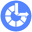

In [34]:
cookie = http.cookiejar.LWPCookieJar()  
cookie.load('cookies1.txt', ignore_discard=True, ignore_expires=True)      #use .load() to read the cookie document
#with handler and opener
handler = urllib.request.HTTPCookieProcessor(cookie)  
opener = urllib.request.build_opener(handler)  
#execute
response = opener.open('http://www.baidu.com')  
print(response.read().decode('utf-8'))

## Deal with ERROR
### URLError

In [35]:
#get the error reason
from urllib import request, error  
try:  
    response = request.urlopen('https://cuiqingcai.com/index.htm')  
except error.URLError as e:  
    print(e.reason)

Not Found


We try to open an unexisting webpage.

### HTTPError
- Deal with HTTP dealing problem
  - code: return the status
  - reason
  - headers
- HTTPError is the child of URLError.

In [36]:
from urllib import request,error  
try:  
    response = request.urlopen('https://cuiqingcai.com/index.htm')  
except error.HTTPError as e:  
    print(e.reason, e.code, e.headers, sep='\n')

Not Found
404
Connection: close
Content-Length: 9339
Server: GitHub.com
Content-Type: text/html; charset=utf-8
Access-Control-Allow-Origin: *
ETag: "6359d044-247b"
Content-Security-Policy: default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'
x-proxy-cache: MISS
X-GitHub-Request-Id: 62C4:7CB3:176333B:1A7B709:6360F2D1
Accept-Ranges: bytes
Date: Tue, 01 Nov 2022 10:20:01 GMT
Via: 1.1 varnish
Age: 0
X-Served-By: cache-bur-kbur8200067-BUR
X-Cache: MISS
X-Cache-Hits: 0
X-Timer: S1667298001.118145,VS0,VE98
Vary: Accept-Encoding
X-Fastly-Request-ID: c81499fd9dd9a008e5509d4dd201aaa94aac71d4




A better way for write error detection:
1. Detect HTTP error
   - return error reason, error status code, headers
2. Detect URL error
   - return error reason
3. Use else to get successful logic

- Sometimes, reason will return an object or a string. Use `isinstance` to judge its detailed type.

In [37]:
#Code Model:
try:  
    response = request.urlopen('https://cuiqingcai.com/index.htm')  
except error.HTTPError as e:  
    print(e.reason, e.code, e.headers, sep='\n')  
except error.URLError as e:  
    print(e.reason)  
else:  
    print('Request Successfully')

Not Found
404
Connection: close
Content-Length: 9339
Server: GitHub.com
Content-Type: text/html; charset=utf-8
Access-Control-Allow-Origin: *
ETag: "6359d044-247b"
Content-Security-Policy: default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'
x-proxy-cache: MISS
X-GitHub-Request-Id: 5DB2:22A2:313BF4:37193C:6360F2D0
Accept-Ranges: bytes
Date: Tue, 01 Nov 2022 10:25:40 GMT
Via: 1.1 varnish
Age: 340
X-Served-By: cache-lax10679-LGB
X-Cache: HIT
X-Cache-Hits: 1
X-Timer: S1667298341.847711,VS0,VE1
Vary: Accept-Encoding
X-Fastly-Request-ID: 9b13f4a901d9eaef9acd0c006ef0c478cd683a35




## Parse the Link
### 1. urlparse

In [38]:
from urllib.parse import urlparse  
result = urlparse('http://www.baidu.com/index.html;user?id=5#comment')  
print(type(result), result)
#the result shows a ParseResult type class, with scheme,netloc,path,params,query,and fragment, these six parts.

<class 'urllib.parse.ParseResult'> ParseResult(scheme='http', netloc='www.baidu.com', path='/index.html', params='user', query='id=5', fragment='comment')


- `http://www.baidu.com/index.html;user?id=5#comment`
   - scheme: before :// part,represent agreements
   - netloc: domain name, before the first /
   - path: after the first /, before ;
   - params: after ; , before ?
   - query: after ?, before #. Normally, it is GET type URL
   - fragment: anchor, the remaining part

- **The standard url link model:**

   `scheme://netloc/path;params?query#fragment`
- The return is a tuple, it can be abstracted by indexing.

In [40]:
from urllib.parse import urlparse  
result = urlparse('www.baidu.com/index.html;user?id=5#comment', scheme='https',allow_fragments=True)  
print(result)
#if we set allow_fragments=False, the remaining fragment part will be ignored when parsing,the return value of fragment=""

ParseResult(scheme='https', netloc='', path='www.baidu.com/index.html', params='user', query='id=5', fragment='comment')


In [42]:
result = urlparse('http://www.baidu.com/index.html;user?id=5#comment', scheme='https')
print(result)

ParseResult(scheme='http', netloc='www.baidu.com', path='/index.html', params='user', query='id=5', fragment='comment')


In [43]:
#indexing
print(result.scheme, result[0], result.netloc, result[1], sep='\n')

http
http
www.baidu.com
www.baidu.com


### urlunparse
- Can be iterated
- The length should be 6
- Oppose to url parse method to construct url

In [44]:
from urllib.parse import urlunparse  
data = ['http', 'www.baidu.com', 'index.html', 'user', 'a=6', 'comment']  
print(urlunparse(data))

http://www.baidu.com/index.html;user?a=6#comment


### urlsplit
- Similar to urlparse
- Only get 5 returns
- Can be abstracted by indexing

In [45]:
from urllib.parse import urlsplit  
result = urlsplit('http://www.baidu.com/index.html;user?id=5#comment')  
print(result)

SplitResult(scheme='http', netloc='www.baidu.com', path='/index.html;user', query='id=5', fragment='comment')


### urlunsplit

In [46]:
from urllib.parse import urlunsplit  
data = ['http', 'www.baidu.com', 'index.html', 'a=6', 'comment']   #5 inputs
print(urlunsplit(data))

http://www.baidu.com/index.html?a=6#comment


### urljoin
- Given a base_url as the first parameter
- Take the new-generated url as the second parameter
- Analyze scheme,netloc,and path these three elements of base_url. Then complete the lackage of new urls.

In [47]:
from urllib.parse import urljoin  
print(urljoin('http://www.baidu.com', 'FAQ.html'))  
print(urljoin('http://www.baidu.com', 'https://cuiqingcai.com/FAQ.html'))  
print(urljoin('http://www.baidu.com/about.html', 'https://cuiqingcai.com/FAQ.html'))  
print(urljoin('http://www.baidu.com/about.html', 'https://cuiqingcai.com/FAQ.html?question=2'))  
print(urljoin('http://www.baidu.com?wd=abc', 'https://cuiqingcai.com/index.php'))  
print(urljoin('http://www.baidu.com', '?category=2#comment'))  
print(urljoin('www.baidu.com', '?category=2#comment'))  
print(urljoin('www.baidu.com#comment', '?category=2'))

http://www.baidu.com/FAQ.html
https://cuiqingcai.com/FAQ.html
https://cuiqingcai.com/FAQ.html
https://cuiqingcai.com/FAQ.html?question=2
https://cuiqingcai.com/index.php
http://www.baidu.com?category=2#comment
www.baidu.com?category=2#comment
www.baidu.com?category=2


### urlencode

In [48]:
from urllib.parse import urlencode  
params = {                  #store parameters in a dictionary
    'name': 'germey',  
    'age': 22  
}  
base_url = 'http://www.baidu.com?'  
url = base_url + urlencode(params)  #convert to GET request parameters
print(url)

http://www.baidu.com?name=germey&age=22


### parse_qs

In [49]:
#convert GET requests to dictionaries
from urllib.parse import parse_qs  
query = 'name=germey&amp;age=22'  
print(parse_qs(query))

{'name': ['germey'], 'amp;age': ['22']}


### parse_qsl

In [50]:
#convert params to list in form of key:value
from urllib.parse import parse_qsl  
query = 'name=germey&amp;age=22'  
print(parse_qsl(query))

[('name', 'germey'), ('amp;age', '22')]


### quote

In [51]:
from urllib.parse import quote  
keyword = ' 壁纸 '  
url = 'https://www.baidu.com/s?wd=' + quote(keyword)   #encode the input content to url format
print(url) 

https://www.baidu.com/s?wd=%20%E5%A3%81%E7%BA%B8%20


### unquote


In [54]:
from urllib.parse import unquote  
url = 'https://www.baidu.com/s?wd=%E5%A3%81%E7%BA%B8'  
print(unquote(url))

https://www.baidu.com/s?wd=壁纸


## Analyze the Robots Exclusion Protocol
- use `robotparser`
- tell crawler which can be crawled, while others cannot.
- `urllib.robotparser.RobotFileParser(url='')`

In [59]:
from urllib.robotparser import RobotFileParser
rp = RobotFileParser()
rp.set_url('http://www.jianshu.com/robots.txt')
rp.read()
print(rp.can_fetch('*', 'http://www.jianshu.com/p/b67554025d7d'))
print(rp.can_fetch('*', "http://www.jianshu.com/search?q=python&page=1&type=collections"))

False
False
